In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
df = pd.read_csv('cleaned_data.csv')

In [6]:
df.head()

,brand,model,model_year,milage_miles,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price_$
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,34999


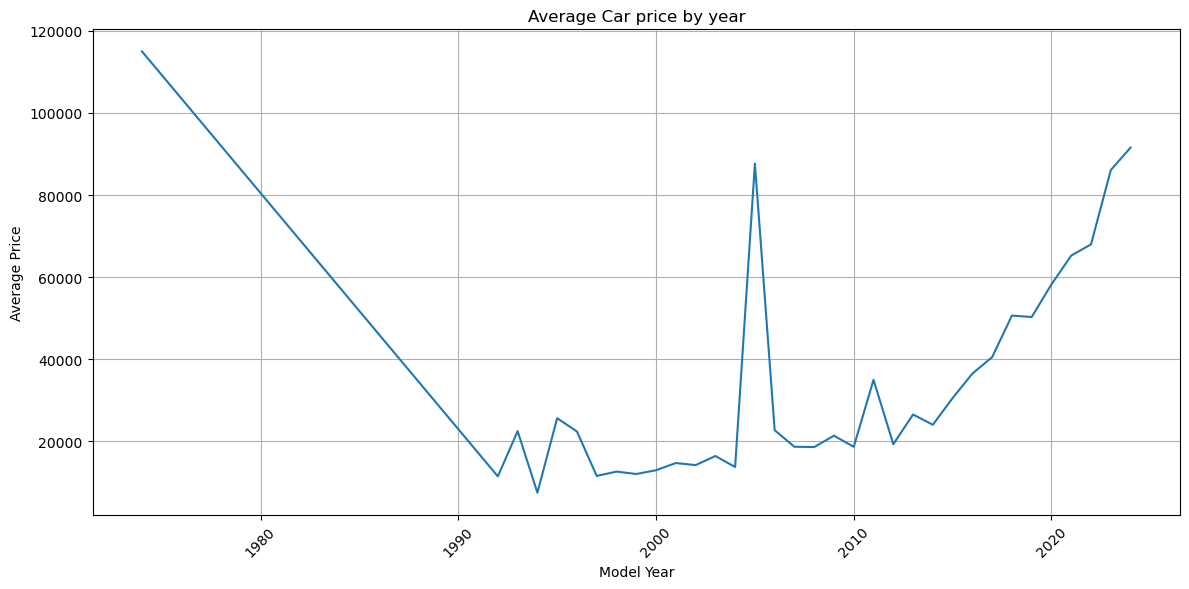

In [7]:
avg_price_byyear = df.groupby('model_year')['price_$'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_price_byyear,x='model_year',y='price_$',markers='o')
plt.title("Average Car price by year")
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

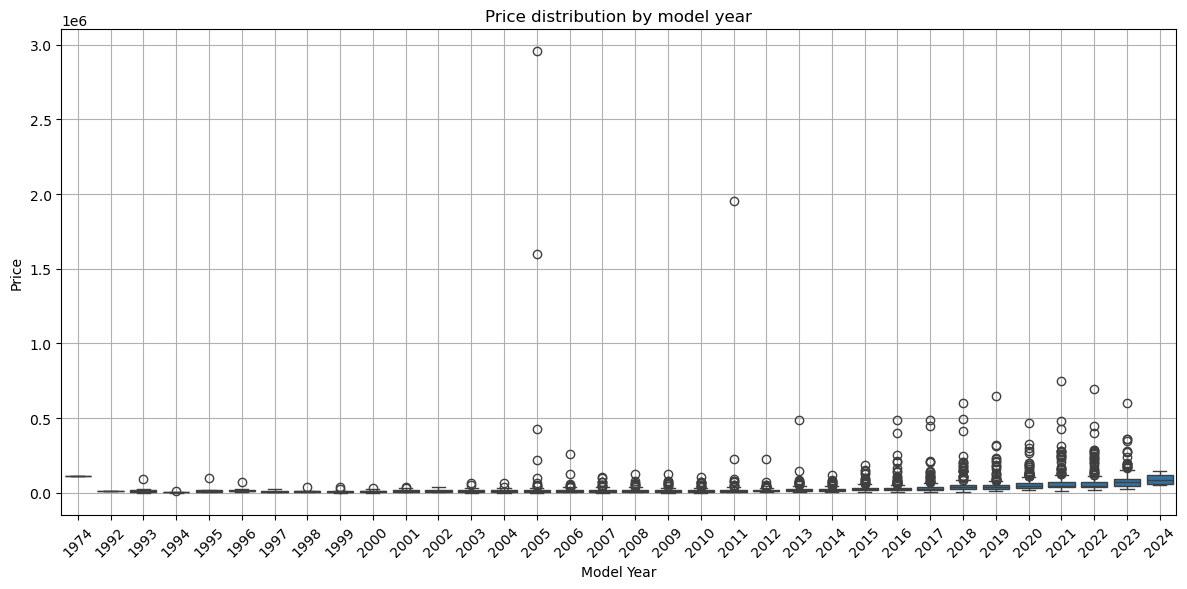

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='model_year',y= 'price_$')
plt.title("Price distribution by model year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

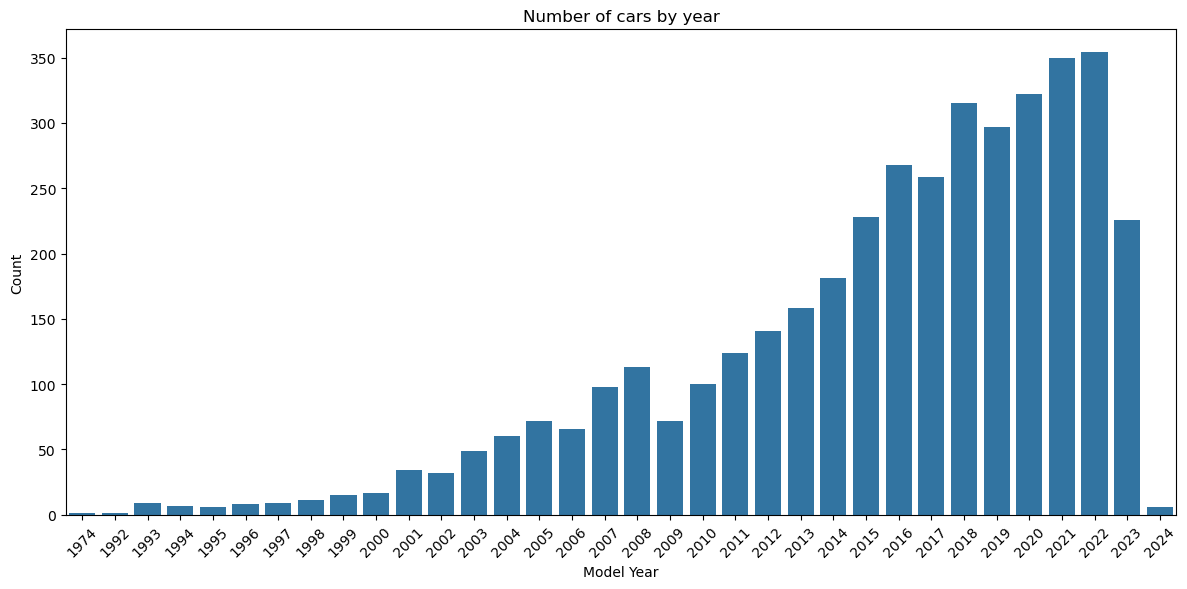

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='model_year',order=sorted(df['model_year'].unique()))
plt.title("Number of cars by year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distibution of ar prices')

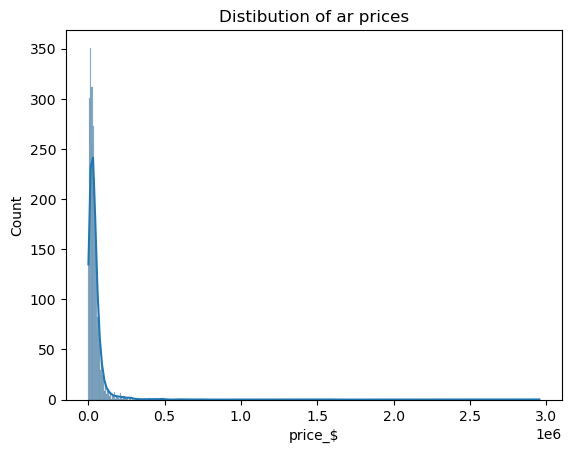

In [10]:
#price distibution plot 

sns.histplot(df['price_$'],kde = True)
plt.title("Distibution of ar prices")

Text(0.5, 1.0, 'Average car price by model year')

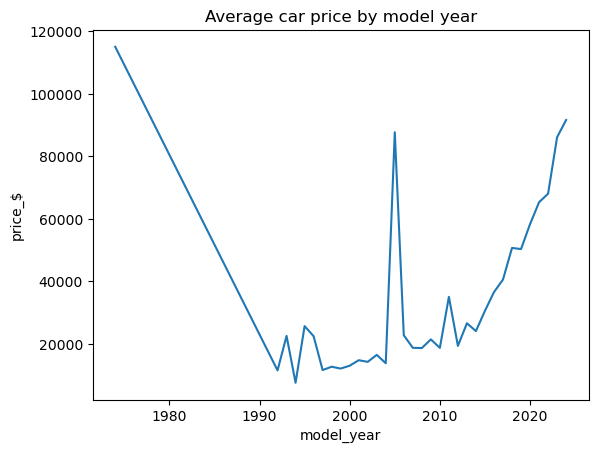

In [11]:
sns.lineplot(data=df.groupby('model_year')['price_$'].mean().reset_index(),x = 'model_year',y='price_$')
plt.title("Average car price by model year")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ford'),
  Text(1, 0, 'Lexus'),
  Text(2, 0, 'Audi'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'Land'),
  Text(5, 0, 'Toyota'),
  Text(6, 0, 'Mercedes-Benz'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Jeep'),
  Text(9, 0, 'Porsche')])

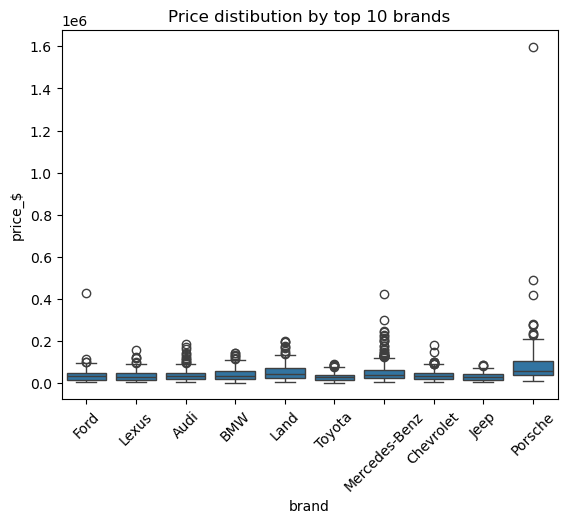

In [12]:
top_brands = df['brand'].value_counts().head(10).index
sns.boxplot(data=df[df['brand'].isin(top_brands)],x='brand',y='price_$')
plt.title("Price distibution by top 10 brands")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Milage vs price')

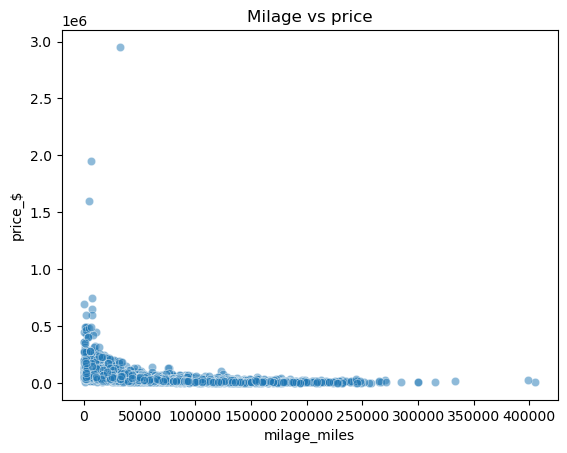

In [13]:
sns.scatterplot(data=df,x='milage_miles',y='price_$',alpha=0.5)
plt.title("Milage vs price")

Text(0.5, 1.0, 'Price by transmission tyep')

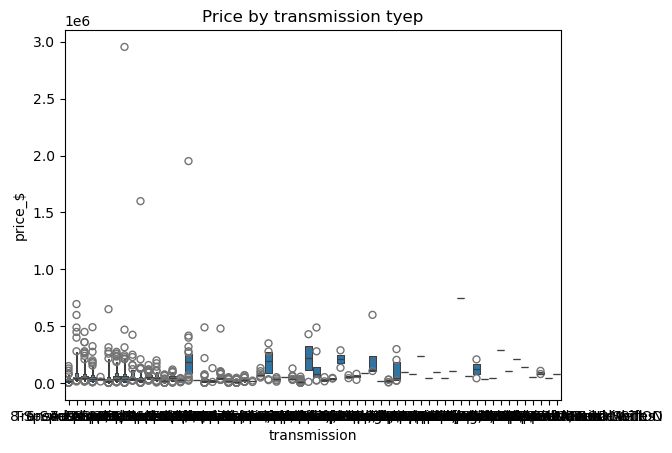

In [14]:
sns.boxenplot(data=df,x='transmission',y='price_$')
plt.title("Price by transmission tyep")

Text(0.5, 1.0, 'Price by fuel type')

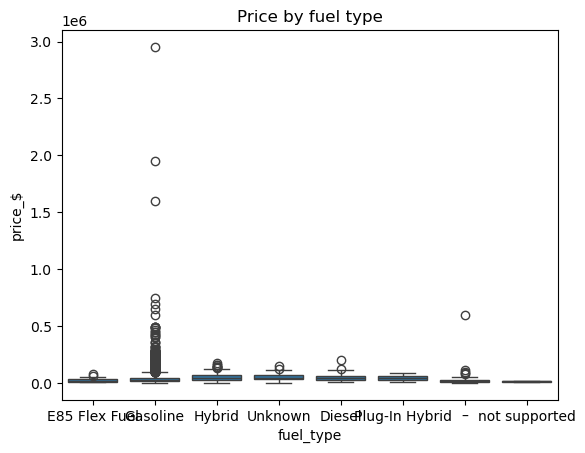

In [15]:
sns.boxplot(data=df,x='fuel_type',y='price_$')
plt.title("Price by fuel type")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Black'),
  Text(1, 0, 'Blue'),
  Text(2, 0, 'Silver'),
  Text(3, 0, 'Green'),
  Text(4, 0, 'White'),
  Text(5, 0, 'Gray'),
  Text(6, 0, 'Red'),
  Text(7, 0, 'Gold'),
  Text(8, 0, 'Beige'),
  Text(9, 0, 'Brown')])

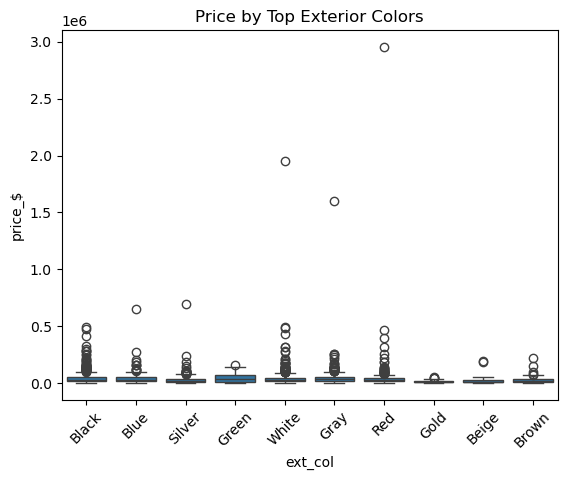

In [16]:
top_colors = df['ext_col'].value_counts().head(10).index
sns.boxplot(data=df[df['ext_col'].isin(top_colors)], x='ext_col', y='price_$')
plt.title("Price by Top Exterior Colors")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Price by Accident History')

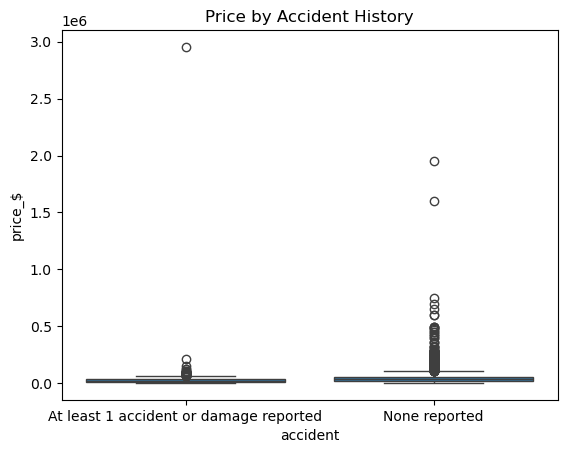

In [17]:
sns.boxplot(data=df, x='accident', y='price_$')
plt.title("Price by Accident History")


Text(0.5, 1.0, 'Price by title status')

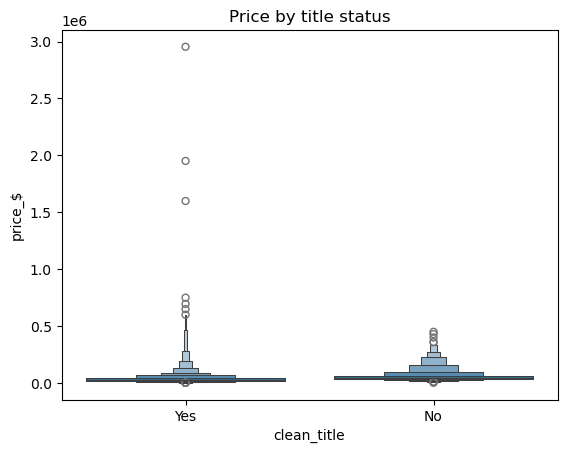

In [18]:
sns.boxenplot(data=df,x='clean_title',y='price_$')
plt.title("Price by title status")

Text(0.5, 1.0, 'Correlation Heatmap')

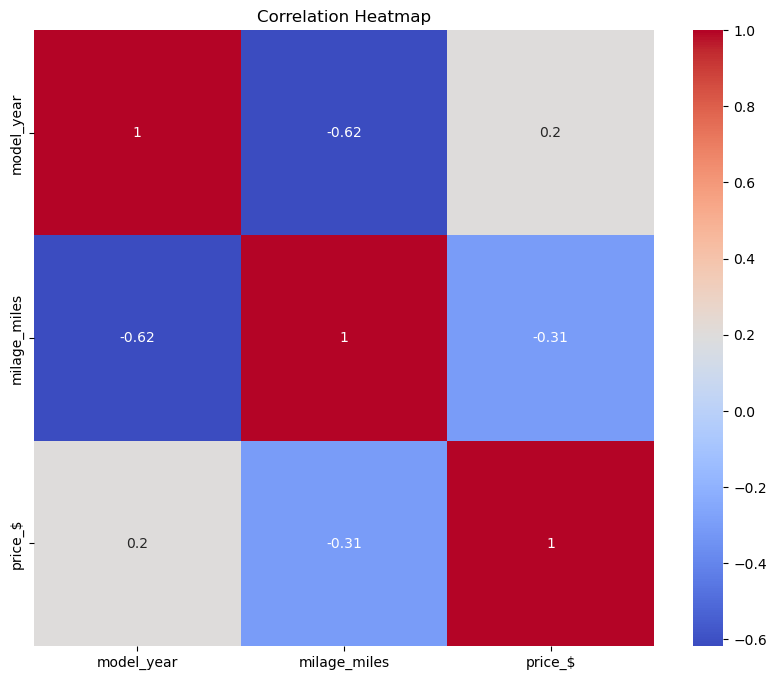

In [19]:
numeric_cols = df.select_dtypes(include=['int64','float64','int32']).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")

<Axes: >

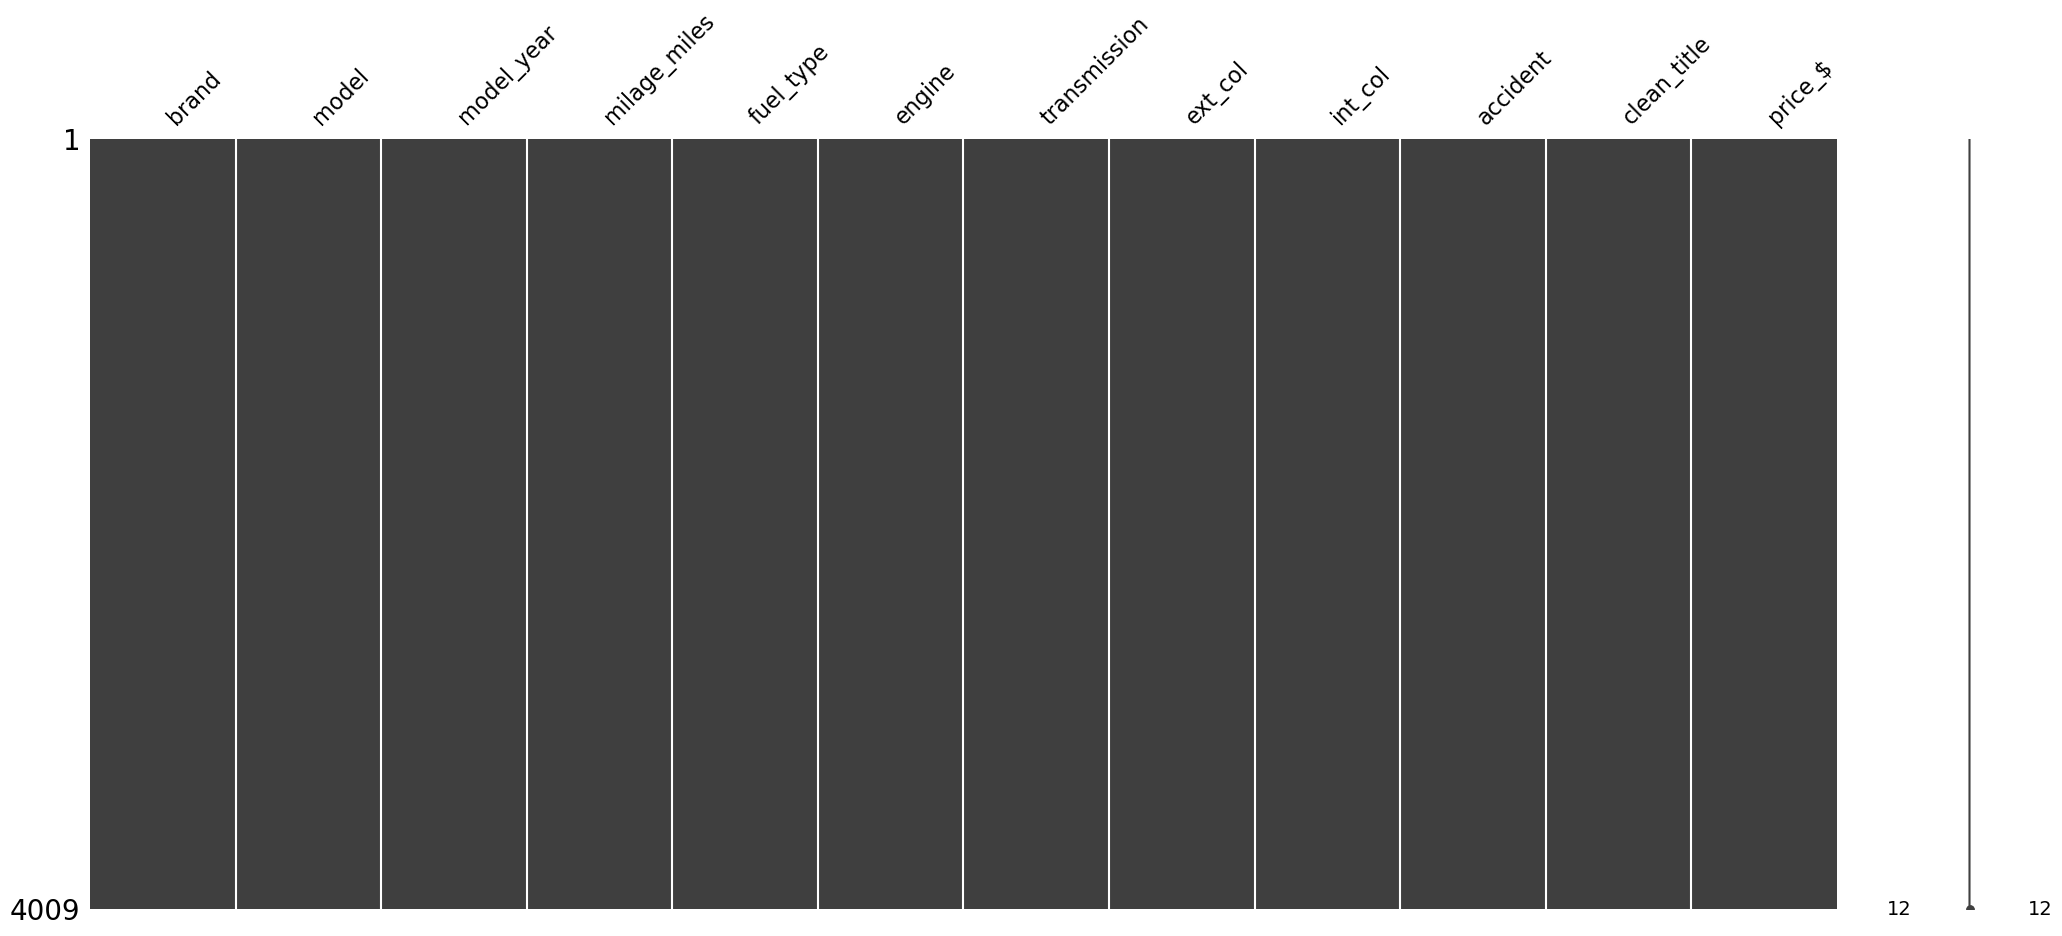

In [20]:
import missingno as msno
msno.matrix(df)


In [21]:
print(df['brand'].value_counts())


brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  